## Motivation

I'll use this script to provide introduction to data analysis using SQL language, which should be a must tool for every data scientist - both for getting access to data, but more interesting, as a simple tool for advance data analysis. The logic behind SQL is very similar to any other tool or language that used for data analysis (excel, Pandas), and for those that used to work with data, should be very intuitive.



In [1]:
#Improts 

import numpy as np
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)


## First we will create the connection to the DB, and see what tables we have

The stracture, and the order of the sections of the query matter, while spaces, new lines, capital words and indentation are there to make the code easier to read.

In [2]:
# connect with soccer database & return a pandas dataframe when SQL query is taken in as argument
def run_query(q):
    with sqlite3.connect(r'C:\Users\Eng-mody\Downloads\soccer\soccer\database.sqlite') as conn:
        return pd.read_sql_query(q, conn)
    
# create a function that calls run_query() function to return a list of all tables & views in the database
def show_tables(q):
    return run_query(q)

In [3]:
# view schema for European Soccer Database
table_query = '''
SELECT name, type 
FROM sqlite_master 
WHERE type IN ("table","view");'''
show_tables(table_query)

,name,type
0,sqlite_sequence,table
1,Player_Attributes,table
2,Player,table
3,Match,table
4,League,table
5,Country,table
6,Team,table
7,Team_Attributes,table


In [4]:
# view columns in Player_Attributes table
q1 = "SELECT * FROM player_attributes"
player_attributes = run_query(q1)

for i,v in enumerate(player_attributes.columns):
    print(i,v)
    


0 id
1 player_fifa_api_id
2 player_api_id
3 date
4 overall_rating
5 potential
6 preferred_foot
7 attacking_work_rate
8 defensive_work_rate
9 crossing
10 finishing
11 heading_accuracy
12 short_passing
13 volleys
14 dribbling
15 curve
16 free_kick_accuracy
17 long_passing
18 ball_control
19 acceleration
20 sprint_speed
21 agility
22 reactions
23 balance
24 shot_power
25 jumping
26 stamina
27 strength
28 long_shots
29 aggression
30 interceptions
31 positioning
32 vision
33 penalties
34 marking
35 standing_tackle
36 sliding_tackle
37 gk_diving
38 gk_handling
39 gk_kicking
40 gk_positioning
41 gk_reflexes


In [5]:
# view columns in Player table
q2 = "SELECT * FROM player"
player = run_query(q2)

for i,v in enumerate(player.columns):
    print(i,v)

0 id
1 player_api_id
2 player_name
3 player_fifa_api_id
4 birthday
5 height
6 weight


In [6]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [7]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [8]:
# view columns in Match table
q3 = "SELECT * FROM Match"
match = run_query(q3)
for i,v in enumerate(match.columns):
    print(i,v)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

In [9]:
# view columns in league table
q4 = "SELECT * FROM League"
league = run_query(q4)
for i,v in enumerate(league.columns):
    print(i,v)

0 id
1 country_id
2 name


In [10]:
# view columns in Country table
q5 = "SELECT * FROM Country"
country = run_query(q5)
for i,v in enumerate(country.columns):
    print(i,v)

0 id
1 name


In [11]:
# view columns in Team table
q6 = "SELECT * FROM Team"
team = run_query(q6)
for i,v in enumerate(team.columns):
    print(i,v)

0 id
1 team_api_id
2 team_fifa_api_id
3 team_long_name
4 team_short_name


In [12]:
# view columns in Team_Attributes table
q7 = "SELECT * FROM Team_Attributes"
team_attributes = run_query(q7)
for i,v in enumerate(team_attributes.columns):
    print(i,v)

0 id
1 team_fifa_api_id
2 team_api_id
3 date
4 buildUpPlaySpeed
5 buildUpPlaySpeedClass
6 buildUpPlayDribbling
7 buildUpPlayDribblingClass
8 buildUpPlayPassing
9 buildUpPlayPassingClass
10 buildUpPlayPositioningClass
11 chanceCreationPassing
12 chanceCreationPassingClass
13 chanceCreationCrossing
14 chanceCreationCrossingClass
15 chanceCreationShooting
16 chanceCreationShootingClass
17 chanceCreationPositioningClass
18 defencePressure
19 defencePressureClass
20 defenceAggression
21 defenceAggressionClass
22 defenceTeamWidth
23 defenceTeamWidthClass
24 defenceDefenderLineClass


In [13]:
team.shape

(299, 5)

In [14]:
team_attributes.shape

(1458, 25)

In [15]:
important_cols=['id','country_id','league_id','season','stage',
                'date','home_team_api_id','away_team_api_id',
                'home_team_goal','away_team_goal','goal',
                'shoton','shotoff','foulcommit','card',
                'cross','corner','possession']

In [16]:
player_attributes = player_attributes.drop(['player_fifa_api_id','player_api_id','agility','reactions','balance'],axis=1)

player =player.drop(['player_api_id','player_fifa_api_id'],axis=1)

match_clean = match[important_cols].copy()



## List of leagues and their country

**JOIN** is used when you want to connect two tables to each other. It works when you have a common key in each of them. Understanding the concept of Keys is crucial for connecting (joining) between data set (tables). A key is uniquely identifies each record (row) in a table. It can consinst of one value (cell) - usually ID, or from a combination of values that are unique in the table.

When joinin between different tables, you must:

**Decide what type of join to use. The most common are:**

**INNER JOIN** - keep only records that match the condition (after the ON) in both the tables, and records in both tables that do not match wouldn't appear in the output

**LEFT JOIN** - keep all the values from the first (left) table - in conjunction with the matching rows from the right table. The columns from the right table, that don't have matching value in the left, would have NULL values.
Specify the common value that is used to connect the tables (the id of the country in that case).
Make sure that at least one of the values has to be a key in its table. In our case, it's the Country.id. The League.country_id is not unique, as there can be more than one league in the same country

In [17]:
q8="""SELECT l.*,
 c.name as country 
 FROM League as l
 JOIN Country as c ON c.id = l.country_id;"""

league_country = run_query(q8)

In [18]:
league_country.head()

,id,country_id,name,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy


## List of players and players attributes

it's obvious that the two table **player and player attributes** are related to each other as both describe players and their positions,stamina and other characterstics so i will oin these two tables to each other to form a single dataframe

In [19]:
q8 = """
SELECT 
    p.player_name,birthday,height,weight,
    pa.*
FROM player p
JOIN player_attributes pa 
ON p.id = pa.id
"""
player_df = run_query(q8)
player_df.shape

(11060, 46)

## List of teams and teams attributes

In [20]:
q9 = """ 
     SELECT *
     FROM Team
     JOIN Team_Attributes
     on Team.id = Team_Attributes.id

     """
team_teamatrr = run_query(q9)

## List of matches

In this exapmle we will show only the columns that interests us, so instead of * we will use the exact names.

Some of the cells have the same name (Country.name,League.name). We will rename them using AS.

As you can see, this query has much more joins. 

Note that Team is joined twice. This is a tricky one, as while we are using the same table name, we basically bring two different copies (and rename them using AS). The reason is that we need to bring information about two different values (home_team_api_id, away_team_api_id), and if we join them to the same table, it would mean that they are equal to each other.

You will also note that the Team tables are joined using left join. The reason is decided that I would prefer to keep the matches in the output - even if on of the teams doesn't appear in the Team table.

In [21]:
q10= """SELECT Match.id, 
        Country.name AS country_name, 
        League.name AS league_name, 
        season, 
        stage, 
        date,
        HT.team_long_name AS  home_team,
        AT.team_long_name AS away_team,
        home_team_goal, 
        away_team_goal                                        
FROM Match

JOIN Country on Country.id = Match.country_id

JOIN League on League.id = Match.league_id

LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id

LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id

"""

matches = run_query(q10)
matches.shape

(25979, 10)

### Neccessary data from SQL queries are used (data cleaning)

In the above, we have joined groups of data into 2 main dataframes for separate analyses:
> - **1st Group**: Player & Player Attributes 
>
> - **2nd Group**: Team & Match 
>
> - **3rd Group**: Team & Team Attributes 

The data cleaning process would seek to accomplish the following: 

> - No duplicated items
> - Be able to make a better decision in dropping rows/columns with null values
> - Ensure datatypes of each column is relevant

### Exploring player_df 

In [22]:
player_df.drop('id', axis=1, inplace=True)

In [23]:
player_df.duplicated().sum()

0

There is no duplicated data in **player_df** so we don't need to drop duplicated

In [24]:
# create new 'year' column to better track performance change for players through years
player_df.date = pd.to_datetime(player_df.date)
player_df.birthday = pd.to_datetime(player_df.birthday)
player_df['year'] = player_df.date.dt.year

In [25]:
player_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Columns: 46 entries, player_name to year
dtypes: datetime64[ns](2), float64(36), int64(4), object(4)
memory usage: 3.9+ MB


In [26]:
player_df.isnull().sum()

player_name              0
birthday                 0
height                   0
weight                   0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating          39
potential               39
preferred_foot          39
attacking_work_rate    163
defensive_work_rate     39
crossing                39
finishing               39
heading_accuracy        39
short_passing           39
volleys                125
dribbling               39
curve                  125
free_kick_accuracy      39
long_passing            39
ball_control            39
acceleration            39
sprint_speed            39
agility                125
reactions               39
balance                125
shot_power              39
jumping                125
stamina                 39
strength                39
long_shots              39
aggression              39
interceptions           39
positioning             39
vision                 125
penalties               39
m

We are interested in overall rating column as it can represent other attributes and be sufficient so let's cheack records which has **Nan** values in this column and if it represent small portion i will drop it

In [27]:
player_df[player_df['overall_rating'].isnull()].shape

(39, 46)

we have only 39 records which has Null values in **overall_rating** columns so i will drop them

In [28]:
player_df.dropna(subset=['overall_rating'],inplace=True)

In [29]:
# drop rows where selected columns below all contain null values
player_df.dropna(subset=['agility', 'balance', 'curve', 'jumping', 'vision', 'sliding_tackle', 'volleys'], how='all', inplace=True)

In [30]:
player_df.isnull().sum()

player_name             0
birthday                0
height                  0
weight                  0
player_fifa_api_id      0
player_api_id           0
date                    0
overall_rating          0
potential               0
preferred_foot          0
attacking_work_rate    59
defensive_work_rate     0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                  0
penalties               0
marking                 0
standing_tac

In [31]:
# drop rows where selected columns below all contain null values
player_df.dropna(subset=['attacking_work_rate'], inplace=True)

In [32]:
# here i subtract 2016 from birthday for each player and i choose 2016 
#as this is the latest date for collecting data according to kaggle website
player_df['Age'] = (player_df['year'] - player_df['birthday'].dt.year)

### Exploring team_teamattr datafram

In [33]:
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

after investigating null values in this dataframe we found that only **buildUpPlayDribbling** has null values which are 969 but we have another column **buildUpPlayDribblingClass** which can provide info for null values to impute it 


And after investigation i figure out that number from 41 are classified to normal so i choose to impute missing values with an average value of **35**

In [34]:
team_attributes[team_attributes['buildUpPlayDribbling'].isnull()][['buildUpPlayDribbling','buildUpPlayDribblingClass']].fillna(35,inplace=True)

In [35]:
team_attributes.duplicated().sum()

0

There is no duplicated data in **team_teamattr** so we don't need to drop duplicated

### Exploring matches dataframe

In [36]:
matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3


In [37]:
matches.duplicated().sum()

0

There is no duplicated data in **matches** so we don't need to drop duplicated

In [38]:
matches.isnull().sum()

id                0
country_name      0
league_name       0
season            0
stage             0
date              0
home_team         0
away_team         0
home_team_goal    0
away_team_goal    0
dtype: int64

## Matches by League

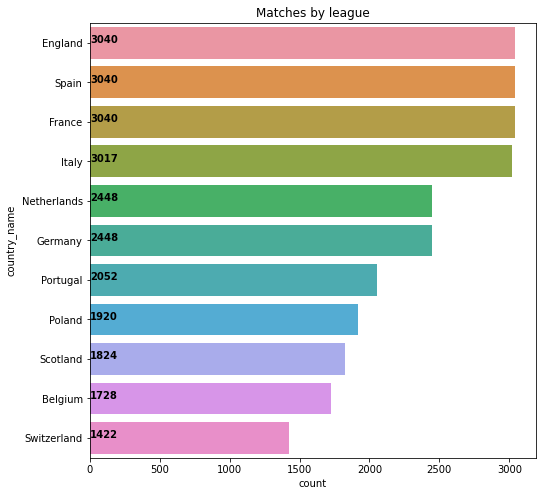

In [39]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y = matches["country_name"],
                   order=matches["country_name"].value_counts().index,
                   #linewidth = 1,
                   #edgecolor = "k"*data["league"].nunique()
                 )
for i,j in enumerate(matches["country_name"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

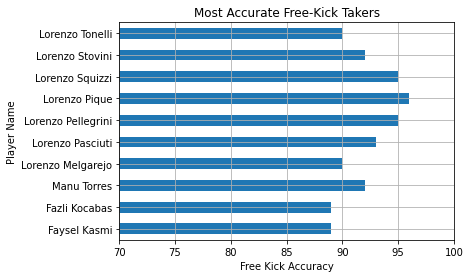

In [40]:
# groupby both player_api_id & player_name in the event of 2 or more players having the same name
freekick_df = player_df.groupby(['player_api_id', 'player_name']).free_kick_accuracy.mean().reset_index()
# drop player_api_id column for plotting
freekick_df.drop(['player_api_id'], axis=1, inplace=True)
# set player_name as index
freekick_df.set_index('player_name', inplace=True)
freekick_df
# find top 0.01% free-kick takers
freekick_df[freekick_df['free_kick_accuracy'] > freekick_df.free_kick_accuracy.quantile(.999)].plot(kind='barh', xlim=(70,100), legend=False)
plt.title('Most Accurate Free-Kick Takers')
plt.xlabel('Free Kick Accuracy')
plt.ylabel('Player Name')
plt.grid(True);

In [41]:
def home_away_diff(dataframe):
    if (dataframe['home_team_goal'] == dataframe['away_team_goal']):
        dataframe['home_away_diff'] = 0
    elif dataframe['home_team_goal'] > dataframe['away_team_goal']:
        dataframe['home_away_diff'] = dataframe['home_team_goal'] - dataframe['away_team_goal']
    else:
        dataframe['home_away_diff'] = 'away_win'
    return dataframe['home_away_diff']

In [42]:
# create an 'outcome' column to track teams' performance
matches['outcome'] = np.where(matches.home_team_goal > matches.away_team_goal,'win','lose')
matches.loc[matches.home_team_goal == matches.away_team_goal, 'outcome'] = 'draw'
matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,outcome
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,draw
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,draw
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,lose
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,win
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,lose


In [43]:
matches['home_away_diff']=matches.apply(lambda row :home_away_diff(row),axis=1)

In [44]:
matches.head()

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,outcome,home_away_diff
0,1,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,draw,0
1,2,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,draw,0
2,3,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,lose,away_win
3,4,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,win,5
4,5,Belgium,Belgium Jupiler League,2008/2009,1,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,lose,away_win


### Home and away goals by league

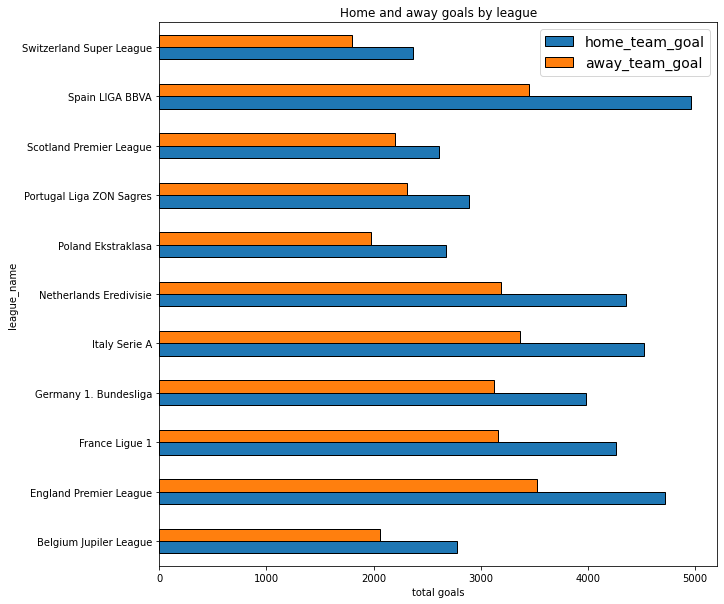

In [45]:
matches.groupby("league_name").agg({"home_team_goal":"sum","away_team_goal":"sum"}).plot(kind="barh",
                                                                                 figsize = (10,10),
                                                                                 edgecolor = "k",
                                                                                 linewidth =1
                                                                                )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

### Match played by Season for each league

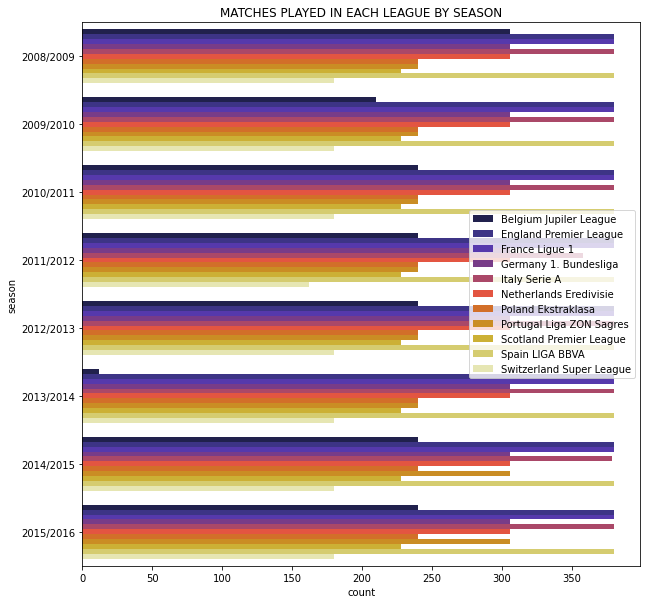

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(y = matches["season"],hue=matches["league_name"],
              palette='CMRmap')
plt.title("MATCHES PLAYED IN EACH LEAGUE BY SEASON")
plt.legend(loc = 'best')
plt.show()

### Top teams by home and away goals

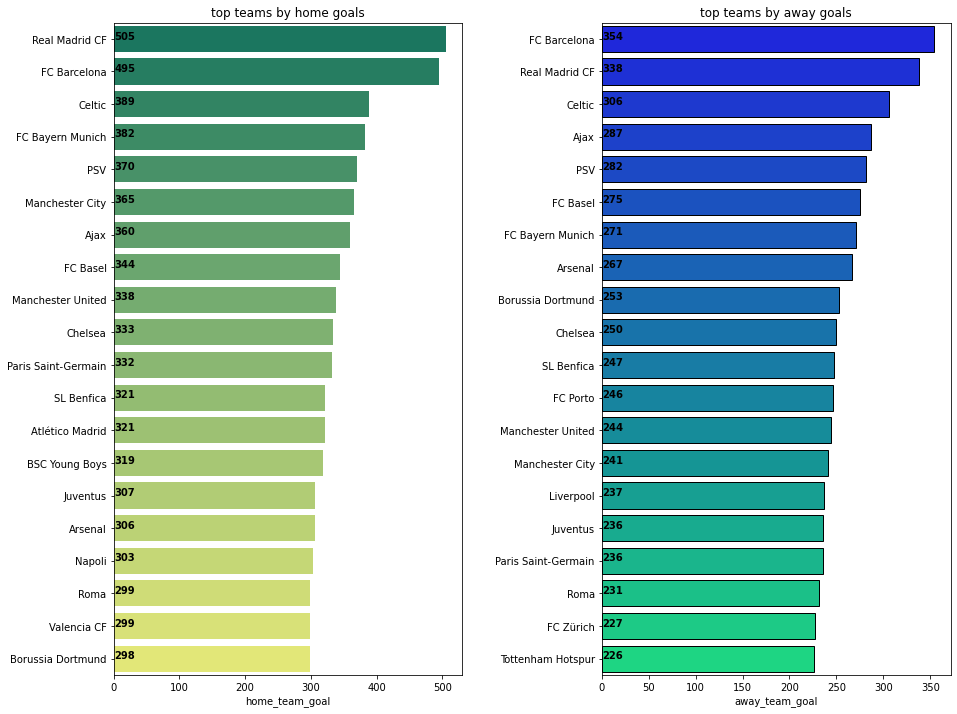

In [47]:
h_t = matches.groupby("home_team")["home_team_goal"].sum().reset_index().sort_values(by="home_team_goal",ascending= False)
a_t = matches.groupby("away_team")["away_team_goal"].sum().reset_index().sort_values(by="away_team_goal",ascending= False)
#h_t = h_t.sort_values(by="home_team_goal",ascending= False)
#a_t = a_t.sort_values(by="away_team_goal",ascending= False)

plt.figure(figsize=(15,12))
plt.subplot(121)
ax = sns.barplot(y="home_team",x="home_team_goal",
                 data=h_t[:20],palette="summer")
plt.ylabel('')
plt.title("top teams by home goals")

for i,j in enumerate(h_t["home_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")
plt.subplot(122)
ax = sns.barplot(y="away_team",x="away_team_goal",
                 data=a_t[:20],palette="winter",
                linewidth = 1,edgecolor = "k"*20)
plt.ylabel("")
plt.subplots_adjust(wspace = .4)
plt.title("top teams by away goals")
for i,j in enumerate(a_t["away_team_goal"][:20]):
    ax.text(.7,i,j,weight = "bold")

### How home teams make use of their stadium and audience 

i will create plots that show home wining rate and by how mush difference in goals for each league 

In [48]:
leagues = matches['league_name'].unique()
grouped= matches.groupby('league_name')

In [49]:
# i will divide the grouped dataframe into smaller dataframes for each country ot explore it alone
Belgium     = grouped.get_group(leagues[0]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
England     = grouped.get_group(leagues[1]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
France      = grouped.get_group(leagues[2]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Germany     = grouped.get_group(leagues[3]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Italy       = grouped.get_group(leagues[4]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Netherlands = grouped.get_group(leagues[5]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Poland      = grouped.get_group(leagues[6]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Portugal    = grouped.get_group(leagues[7]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Scotland    = grouped.get_group(leagues[8]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Spain       = grouped.get_group(leagues[9]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)
Switzerland = grouped.get_group(leagues[10]).groupby('home_away_diff')['home_away_diff'].count().sort_values(ascending= False)


In [50]:
# this function to help my avoid reptitive code to plot away home differencies in goals for each leage
def plot_away_home(data,order,title):
    '''
    this function to plot data for each league
    
    INPUTS: data: which is a dataframe from groupping stage
            order: this number to define place of subplot to use
            title: this is a string provided to plt.title function
    '''
    plt.subplot(4,3,order)
    ax = sns.barplot(y=data.index,x=data,palette="summer",
                 linewidth = 1,edgecolor = "k"*20)
    plt.ylabel('')
    plt.title(title)
    for i,j in enumerate(data):
        ax.text(.7,i,j,weight = "bold")
    

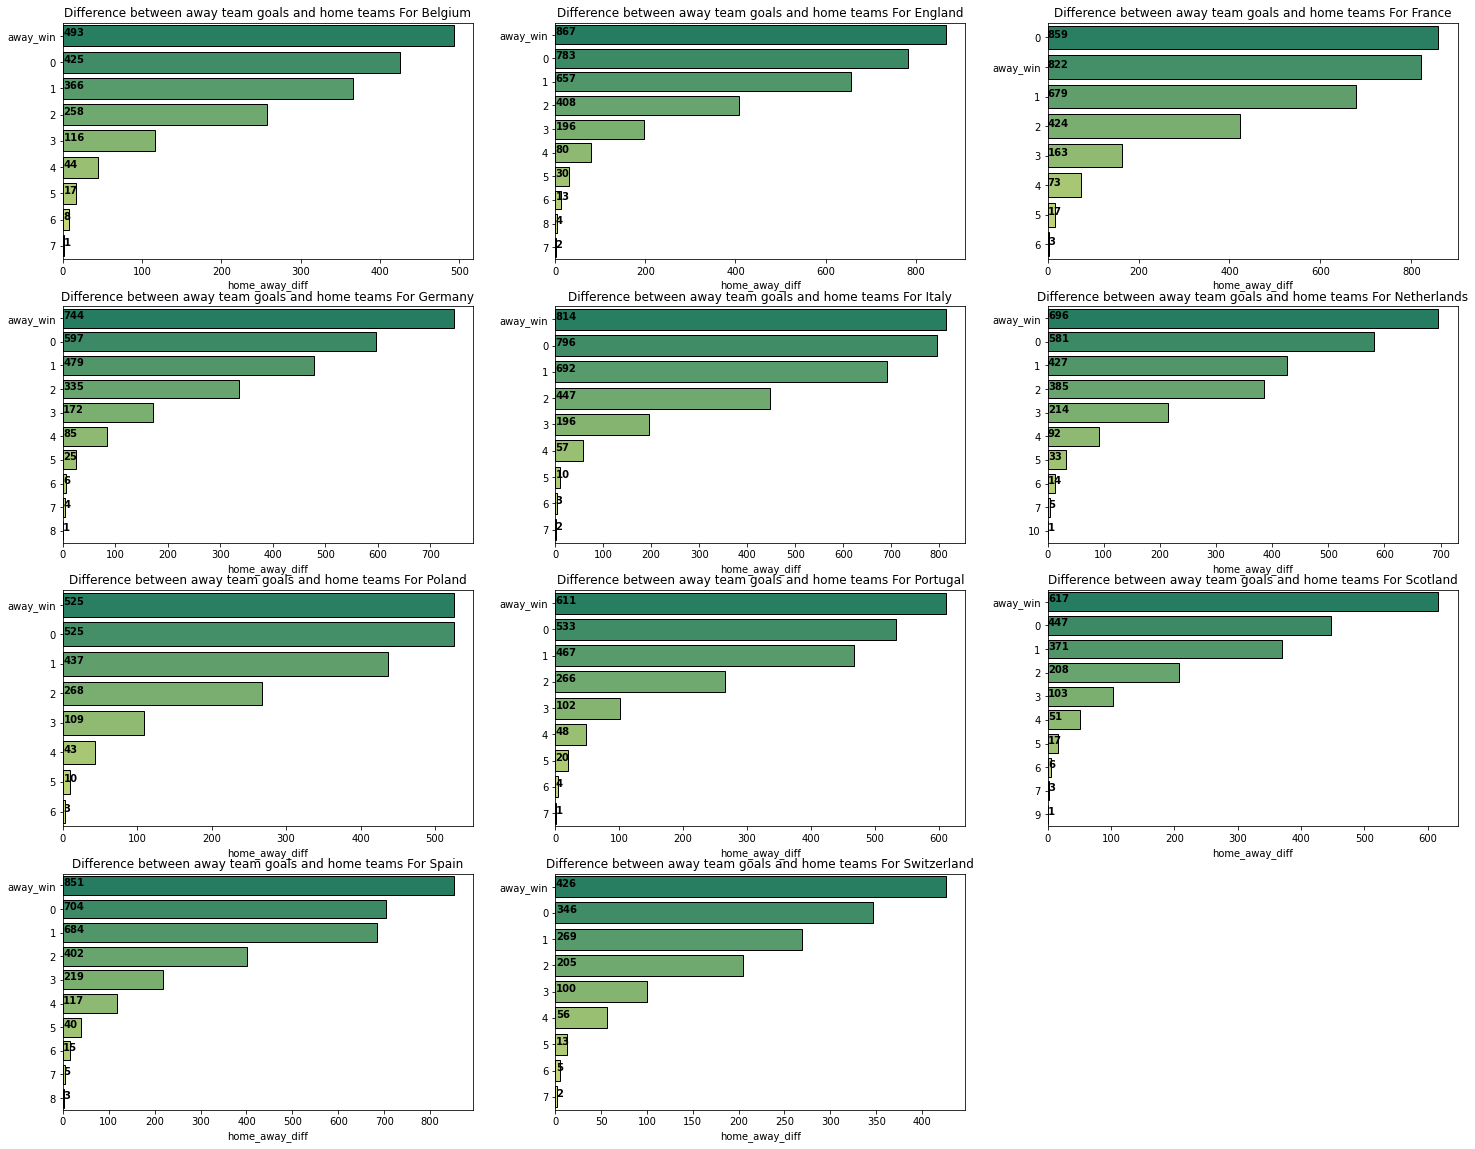

In [51]:
plt.figure(figsize=(25,20))
plot_away_home(Belgium,1,"Difference between away team goals and home teams For Belgium")
plot_away_home(England,2,"Difference between away team goals and home teams For England")
plot_away_home(France,3,"Difference between away team goals and home teams For France")
plot_away_home(Germany,4,"Difference between away team goals and home teams For Germany")
plot_away_home(Italy,5,"Difference between away team goals and home teams For Italy")
plot_away_home(Netherlands,6,"Difference between away team goals and home teams For Netherlands")
plot_away_home(Poland,7,"Difference between away team goals and home teams For Poland")
plot_away_home(Portugal,8,"Difference between away team goals and home teams For Portugal")
plot_away_home(Scotland,9,"Difference between away team goals and home teams For Scotland")
plot_away_home(Spain,10,"Difference between away team goals and home teams For Spain")
plot_away_home(Switzerland,11,"Difference between away team goals and home teams For Switzerland")


It's clear that for many leagues there are a great competitions between teams and no matter where match is played as we see in

**Belgiume -England-Germany-Netherlands-Portugal-Scotland-Spain-Swittzerland and Italy with slight larger than draw rate** many away team win matches on Home team stadium While in **Poland** didn't differ much as matches end with draw is equal to matches win by away team  

In [52]:
season08_09 = matches[matches['season'] == '2008/2009'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season09_10 = matches[matches['season'] == '2009/2010'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season10_11 = matches[matches['season'] == '2010/2011'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season11_12 = matches[matches['season'] == '2011/2012'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season12_13 = matches[matches['season'] == '2012/2013'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season13_14 = matches[matches['season'] == '2013/2014'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season14_15 = matches[matches['season'] == '2014/2015'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)
season15_16 = matches[matches['season'] == '2015/2016'].copy().groupby(['home_team']).outcome.describe().reset_index().sort_values(by='freq', ascending=False)

In [53]:
# i will filter each season to teams with top frequent type is win and lose 
#to figure out top winning teams and losing teams each season


season08_09_win = season08_09.top == 'win'
season08_09_lose = season08_09.top == 'lose'
#############
season09_10_win = season09_10.top == 'win'
season09_10_lose = season09_10.top == 'lose'
#############
season10_11_win = season10_11.top == 'win'
season10_11_lose = season10_11.top == 'lose'
#############
season11_12_win = season11_12.top == 'win'
season11_12_lose = season11_12.top == 'lose'
#############
season12_13_win = season12_13.top == 'win'
season12_13_lose = season12_13.top == 'lose'
#############
season13_14_win = season13_14.top == 'win'
season13_14_lose = season13_14.top == 'lose'
#############
season14_15_win = season14_15.top == 'win'
season14_15_lose = season14_15.top == 'lose'
#############
season15_16_win = season15_16.top == 'win'
season15_16_lose = season15_16.top == 'lose'


In [54]:
best_08_09 = season08_09[season08_09_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_09_10 = season09_10[season09_10_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_10_11 = season10_11[season10_11_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_11_12 = season11_12[season11_12_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_12_13 = season12_13[season12_13_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_13_14 = season13_14[season13_14_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_14_15 = season14_15[season14_15_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
best_15_16 = season15_16[season15_16_win].sort_values(by='freq', ascending=False).head(10).set_index('home_team')


In [55]:
worst_08_09 = season08_09[season08_09_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_09_10 = season09_10[season09_10_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_10_11 = season10_11[season10_11_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_11_12 = season11_12[season11_12_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_12_13 = season12_13[season12_13_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_13_14 = season13_14[season13_14_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_14_15 = season14_15[season14_15_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')
worst_15_16 = season15_16[season15_16_lose].sort_values(by='freq', ascending=False).head(10).set_index('home_team')


In [56]:
Bests = [best_08_09,best_09_10,best_10_11,best_11_12,best_12_13,best_13_14,best_14_15,best_15_16]
Worsts = [worst_08_09,worst_09_10,worst_10_11,worst_11_12,worst_12_13,worst_13_14,worst_14_15,worst_15_16]
orders = [1,2,3,4,5,6,7,8]
Titles =['Teams With The Most Wins in Season 2008/2009',
        'Teams With The Most Wins in Season 2009/2010',
        'Teams With The Most Wins in Season 2010/2011',
        'Teams With The Most Wins in Season 2011/2012',
        'Teams With The Most Wins in Season 2012/2013',
        'Teams With The Most Wins in Season 2013/2014',
        'Teams With The Most Wins in Season 2014/2015',
        'Teams With The Most Wins in Season 2015/2016']

Titles2 =['Teams With The Most loses in Season 2008/2009',
        'Teams With The Most loses in Season 2009/2010',
        'Teams With The Most loses in Season 2010/2011',
        'Teams With The Most loses in Season 2011/2012',
        'Teams With The Most loses in Season 2012/2013',
        'Teams With The Most losess in Season 2013/2014',
        'Teams With The Most losess in Season 2014/2015',
        'Teams With The Most loses in Season 2015/2016']

In [57]:
def plot_by_season(data,order,title):
    
    '''
    this function to plot data for each league
    
    INPUTS: data: which is a dataframe from groupping stage
            order: this number to define place of subplot to use
            title: this is a string provided to plt.title function
    '''
    plt.subplot(3,3,order)
    ax = sns.barplot(y=data.index,x=data.freq,
                 linewidth = 1,edgecolor = "k"*20)
    plt.ylabel('Team Names')
    plt.xlabel('No. Of Wins')
    plt.grid()
    plt.title(title)

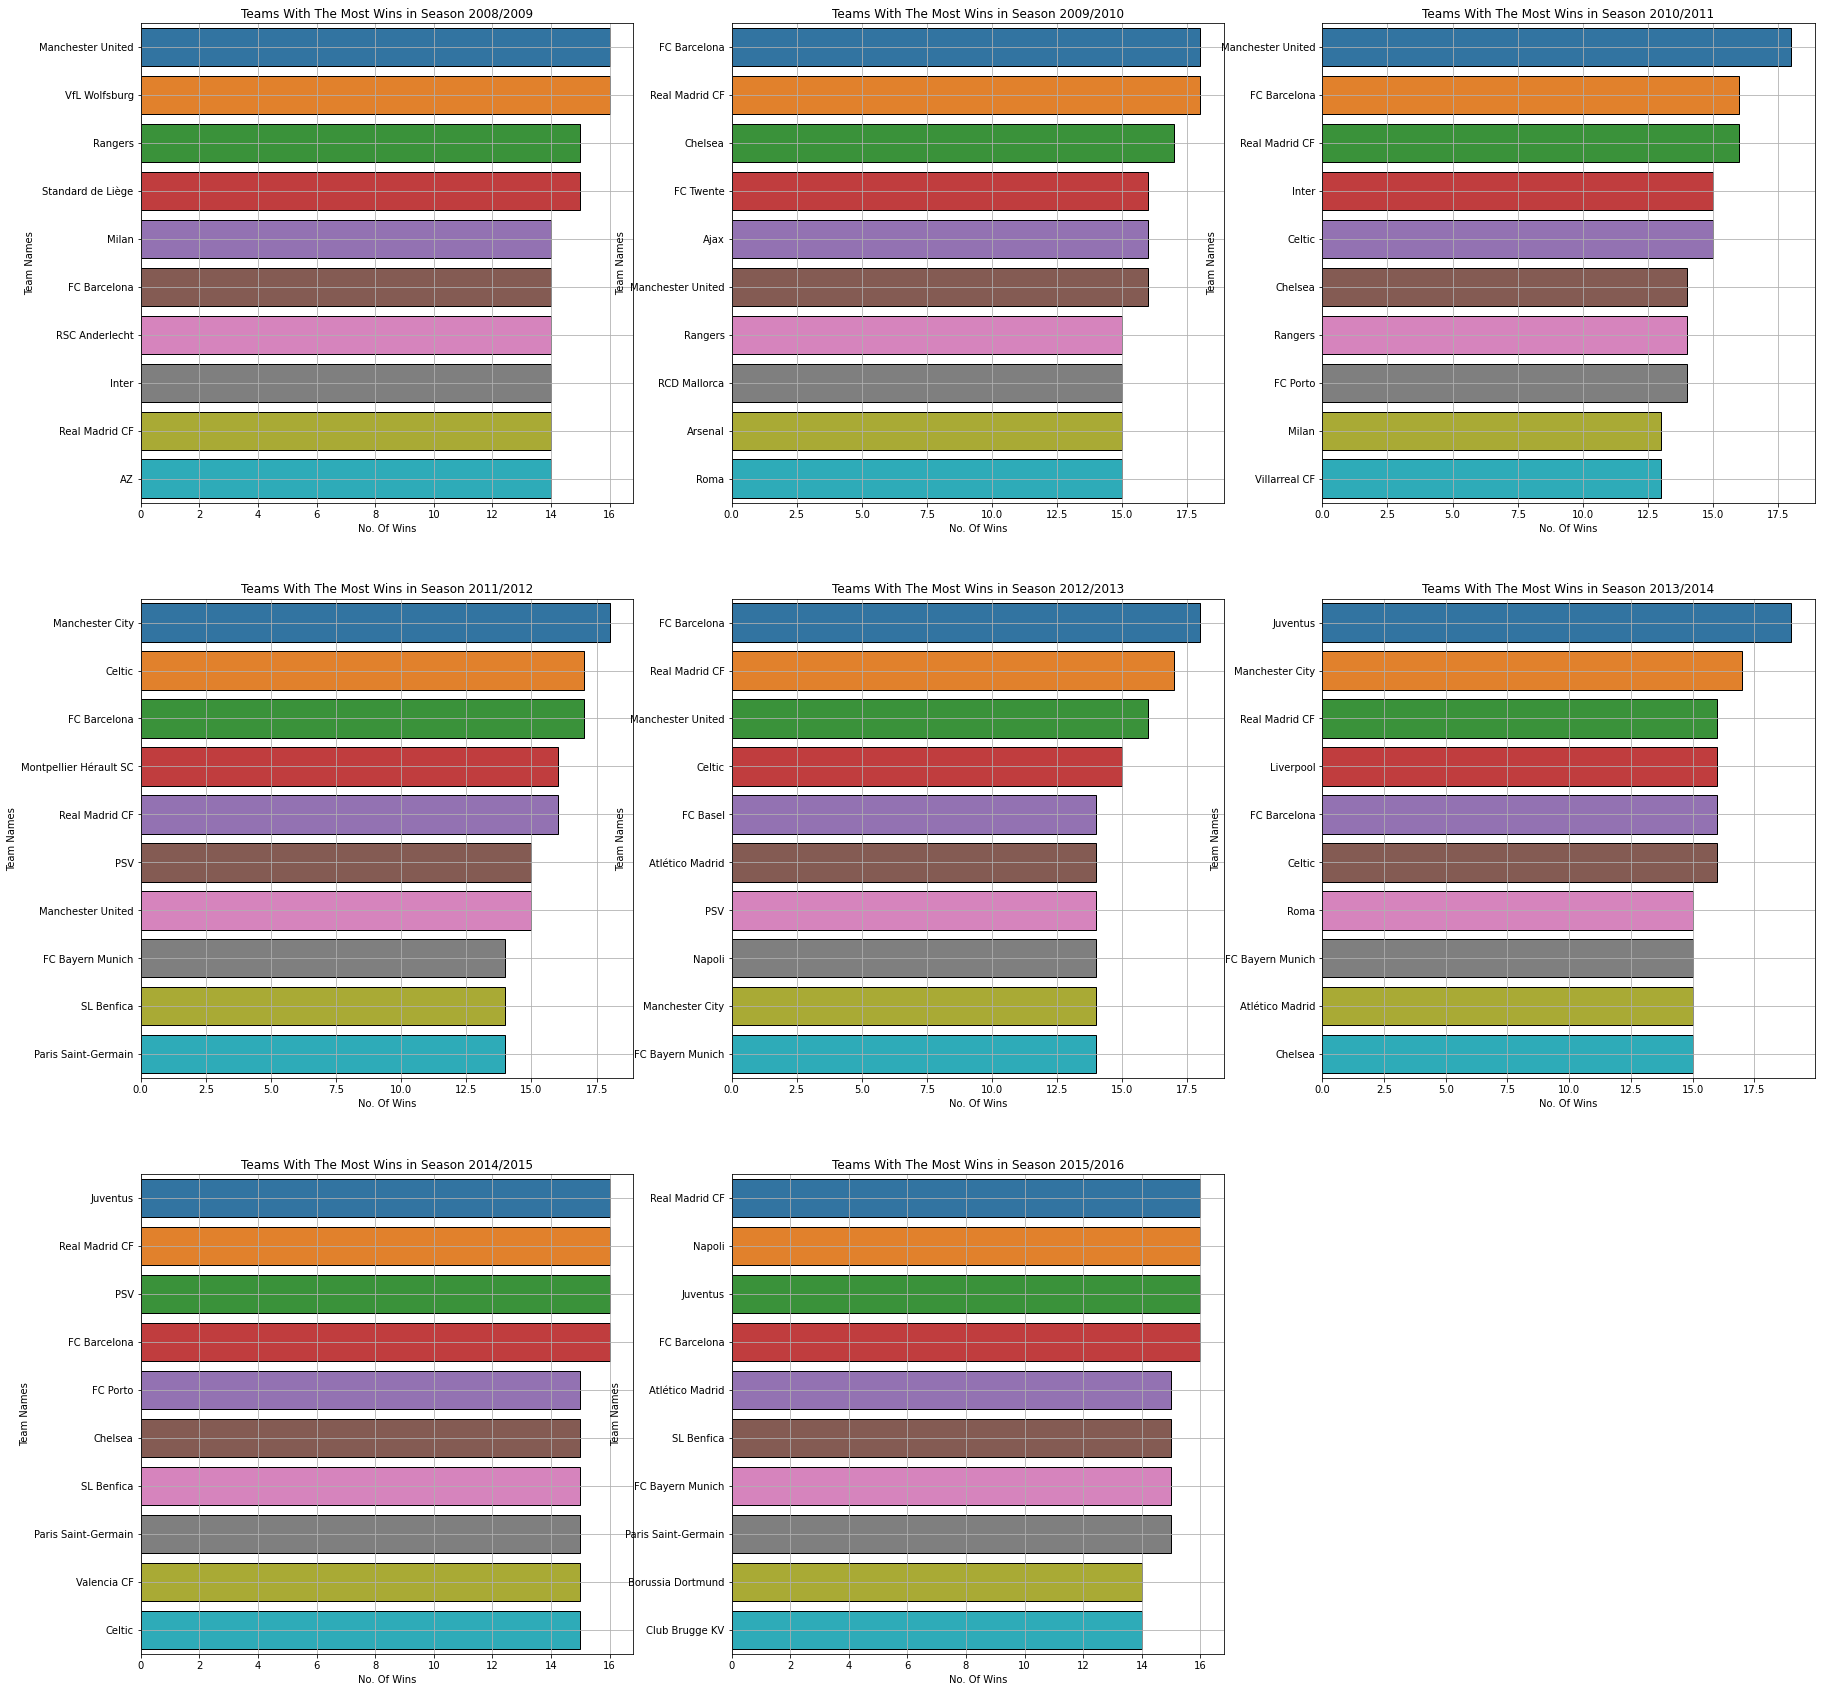

In [58]:
plt.figure(figsize=(30,30))
for i,best in enumerate(Bests):
    plot_by_season(best,orders[i],Titles[i])

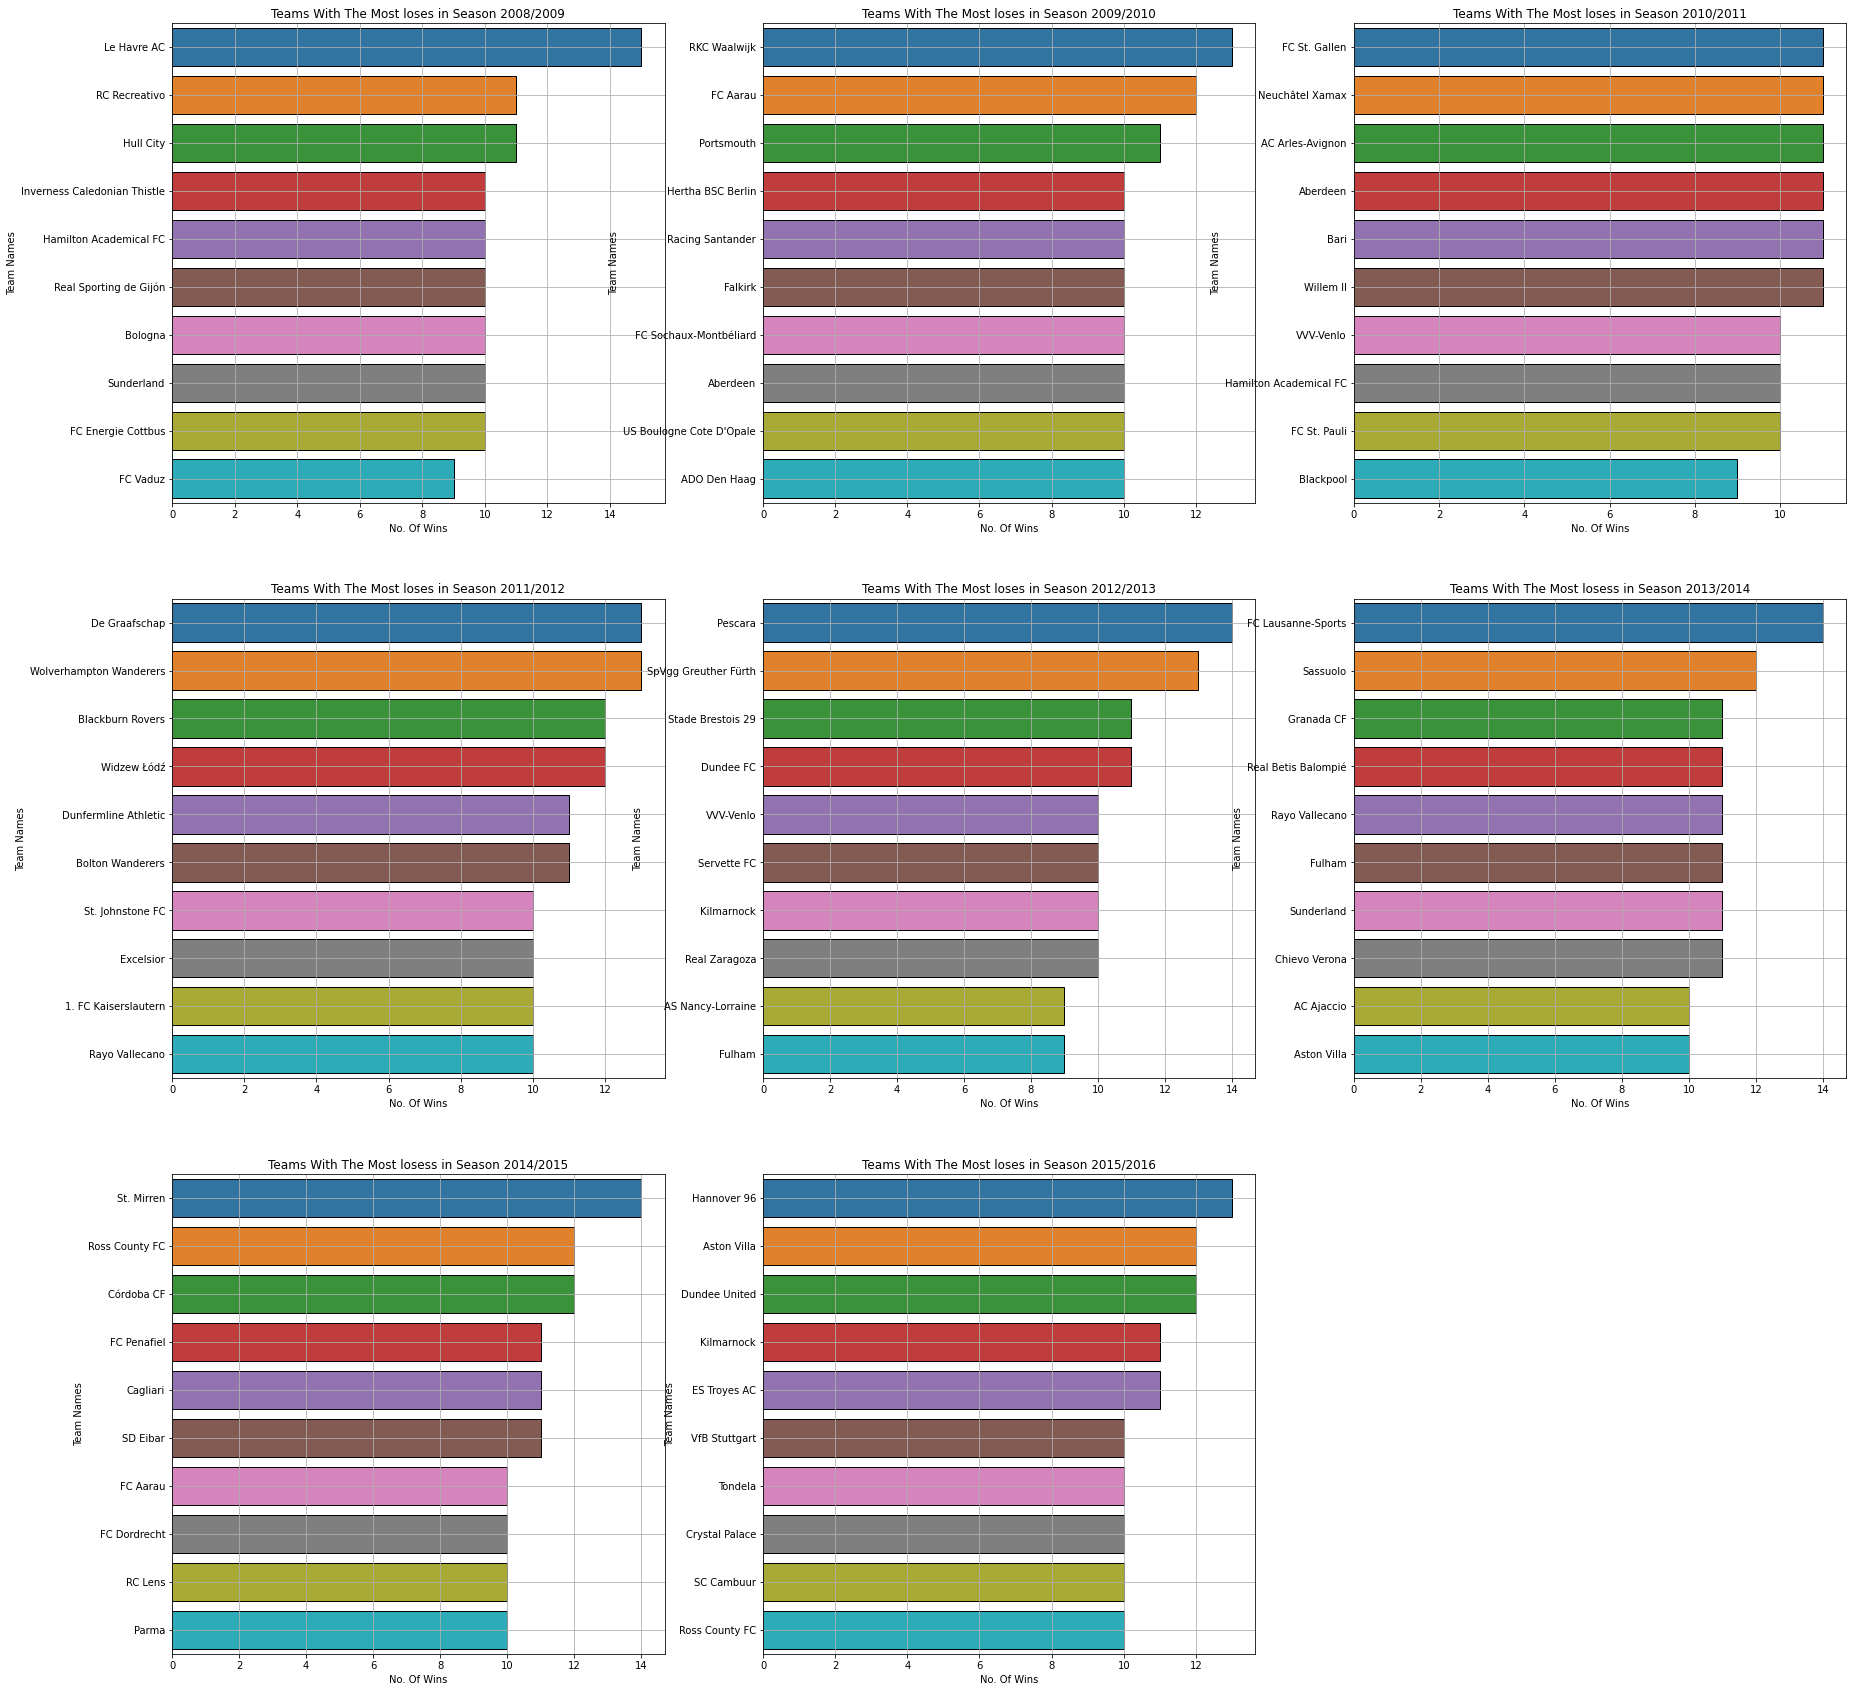

In [59]:
plt.figure(figsize=(30,30))
for i,worst in enumerate(Worsts):
    plot_by_season(worst,orders[i],Titles2[i])

There are some teams are in top winning team for more than one season such as **Fc Barcelona - Real madrid -Celtic- Paris saint germman** Which are most good teams all over the world 

In [60]:
# filter top teams over all seasons which know as greatest all over the time GOAT
alltime_best_teams = matches.groupby(['home_team']).outcome.describe().sort_values(by='freq',ascending=False).reset_index().set_index('home_team')
alltime_best_teams=alltime_best_teams.head(15)

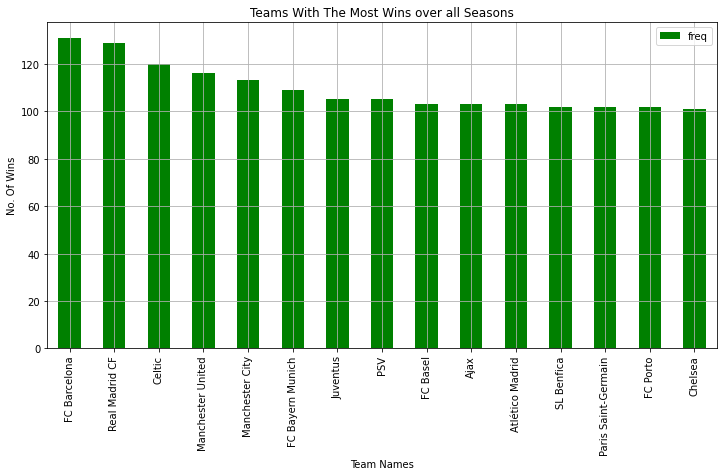

In [61]:
alltime_best_teams.drop(['count', 'unique', 'top'],axis=1).plot(kind='bar', figsize=(12,6),color='green',legend=True)
plt.title('Teams With The Most Wins over all Seasons')
plt.xlabel('Team Names')
plt.ylabel('No. Of Wins')
plt.grid();

## Conclusions

No doubts here, home advantage is a very big part of football. Very interestingly even though La Liga takes the cake in terms of most number of goals score EPL still has more away goals scored. Also important to note here that even though the German League has significantly lower number of matches(2448 for 8 seasons whereas others have 3040) it still rakes in a lot of goals and has the highest average goals per game amongst all.

I believe I could have expressed the visualisations in a clearer manner with different kind of plots which I have yet to learn, and draw correlations more easily & quickly.

I have concluded that home team stadium and audience didn't contribute a lot in matches result as many leagues away teams win the matches 

**Real madrid and Barcelona** both are top teams in all leagues in away and home goals they have incredible attack line and striker like **Cristiano ronaldo and Messi**
